In [6]:
using Plots
using LinearAlgebra

In [7]:
function multivariate_normal(x, d, mean, covariance)
    x_m = x .- mean
    return (1. / (sqrt((2 * π)^d * det(covariance))) * 
            exp(-(x_m' * inv(covariance) * x_m) / 2))
end

multivariate_normal (generic function with 2 methods)

In [29]:
function generate_surface(mean, covariance, d)
    nb_of_x = 100 # grid size
    x1s = range(-5, stop=5, length=nb_of_x)
    x2s = range(-5, stop=5, length=nb_of_x)
    x1, x2 = meshgrid(x1s, x2s) # Generate grid
    pdf = zeros(Float64, nb_of_x, nb_of_x)
    
    for i in 1:nb_of_x
        for j in 1:nb_of_x
            pdf[i, j] = multivariate_normal(
                [x1[i, j], x2[i, j]],
                d, mean, covariance
            )
        end
    end
    
    return x1, x2, pdf
end


generate_surface (generic function with 2 methods)

In [32]:
# function meshgrid(x, y)
#     return [xi for xi in x, yi in y], [yi for xi in x, yi in y]
# end

function meshgrid(x, y)
   X = [x for _ in y, x in x]
   Y = [y for y in y, _ in x]
   X, Y
end

# Example usage
x1s = range(-5, stop=5, length=100)
x2s = range(-5, stop=5, length=100)

x1, x2 = meshgrid(x1s, x2s)

# Now x1 and x2 are matrices representing the meshgrid


([-5.0 -4.898989898989899 … 4.898989898989899 5.0; -5.0 -4.898989898989899 … 4.898989898989899 5.0; … ; -5.0 -4.898989898989899 … 4.898989898989899 5.0; -5.0 -4.898989898989899 … 4.898989898989899 5.0], [-5.0 -5.0 … -5.0 -5.0; -4.898989898989899 -4.898989898989899 … -4.898989898989899 -4.898989898989899; … ; 4.898989898989899 4.898989898989899 … 4.898989898989899 4.898989898989899; 5.0 5.0 … 5.0 5.0])

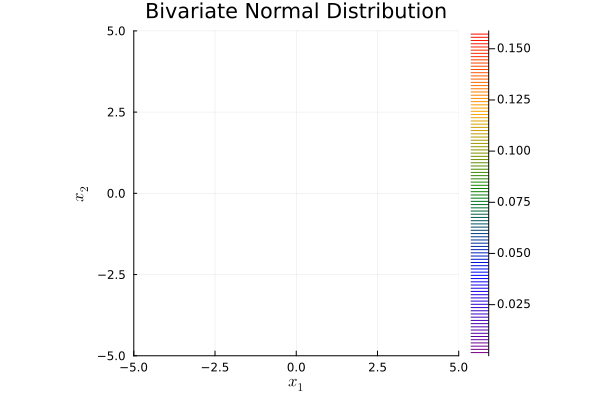

Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.


In [33]:
using Plots

# Define multivariate normal distribution parameters
bivariate_mean = [0.0, 0.0]  # Mean
bivariate_covariance = [1.0 0.0; 0.0 1.0]  # Covariance

# Generate surface
x1, x2, pdf = generate_surface(bivariate_mean, bivariate_covariance, 2)

# Plot bivariate distribution
plot(
    contour(x1, x2, pdf, levels=100, color=:rainbow),
    xlabel="\$x_1\$", ylabel="\$x_2\$",
    xlim=(-5, 5), ylim=(-5, 5),
    aspect_ratio=:equal,
    title="Bivariate Normal Distribution"
)


Arrays have incorrect length or dimension.


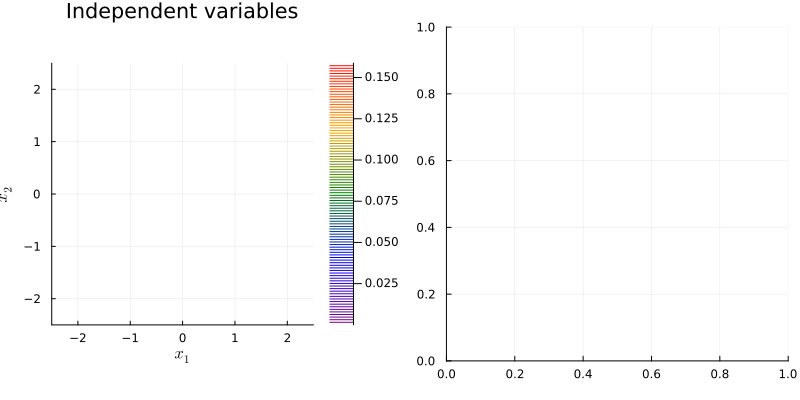

Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.


In [21]:
# Plot bivariate distribution
bivariate_mean = [0.0, 0.0]  # Mean
bivariate_covariance = [1.0 0.0; 0.0 1.0]  # Covariance
x1, x2, p = generate_surface(bivariate_mean, bivariate_covariance)

# subplot
plt = plot(layout=(1, 2), size=(800, 400))

contour!(plt[1], x1, x2, p, levels=100, color=:rainbow, xlabel="\$x_1\$", ylabel="\$x_2\$",
         xlim=(-2.5, 2.5), ylim=(-2.5, 2.5), aspect_ratio=:equal,
         title="Independent variables")

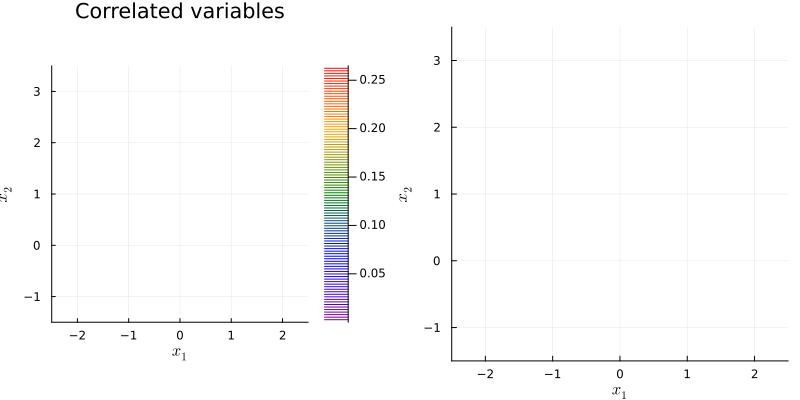

Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.


In [18]:

# Plot of correlated Normals
bivariate_mean = [0.0, 1.0]  # Mean
bivariate_covariance = [1.0 0.8; 0.8 1.0]  # Covariance
x1, x2, p = generate_surface(bivariate_mean, bivariate_covariance)

contour!(x1, x2, Matrix(p), levels=100, color=:rainbow, xlabel="\$x_1\$", ylabel="\$x_2\$",
         xlim=(-2.5, 2.5), ylim=(-1.5, 3.5), aspect_ratio=:equal,
         title="Correlated variables")

# Add colorbar and title
# colorbar(plt[2], label="\$p(x_1, x_2)\$")
# suptitle!("Bivariate normal distributions", fontsize=13, y=0.95)
# savefig("Bivariate_normal_distribution.png")
display(plt)


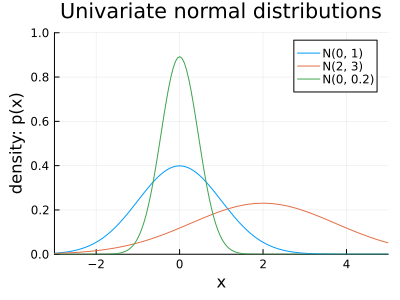

In [2]:
function univariate_normal(x, mean, variance)
    x_array = collect(x)
    return (1. / sqrt(2 * π * variance)) * exp.(-(x_array .- mean).^2 / (2 * variance))
end

# Plot different Univariate Normals in a single plot
x = range(-3, stop=5, length=150)

plot(x, univariate_normal(x, 0, 1), label="N(0, 1)")
plot!(x, univariate_normal(x, 2, 3), label="N(2, 3)")
plot!(x, univariate_normal(x, 0, 0.2), label="N(0, 0.2)",
      xlabel="x", ylabel="density: p(x)", title="Univariate normal distributions",
      ylim=(0, 1), xlim=(-3, 5), legend=:topright, size=(400, 300))
